In [3]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import plotly.express as px
from scipy.stats import linregress
from matplotlib.ticker import FuncFormatter
%matplotlib inline

pd.options.mode.chained_assignment = None 

In [4]:
#read in csv
avocado = pd.read_csv("Project Resources/Avocado.csv")
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
2,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany
3,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany
4,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany


In [5]:
#change date from object to date
avocado["Date"] = pd.to_datetime(avocado.Date)

In [6]:
avocado["Month"] = avocado.Date.dt.month
avocado["Millions"]= avocado["Total Volume"]/1000000
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Millions
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,0.040873
1,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,1,0.041195
2,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany,1,0.044511
3,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany,1,0.045148
4,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany,2,0.070874


In [11]:
#calculate the sum of all the avoc sold for each month for all 5 years
avopltvol = (avocado.groupby(["Month"])["Millions"].agg(['sum']).round(decimals=0))
month_price_avg = (avocado.groupby(["Month"])["AveragePrice"].agg(['mean']).round(decimals=2))
mergestart= pd.merge(month_price_avg, avopltvol, how="outer", on="Month")
mergestart.head(12)


,mean,sum
Month,,
1,1.30,2364.0
2,1.26,2294.0
3,1.31,2258.0
4,1.37,2302.0
5,1.37,2489.0
6,1.42,2249.0
7,1.48,2287.0
8,1.51,1972.0
9,1.53,2011.0


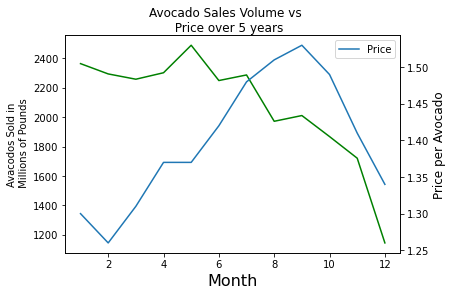

In [13]:
#overlay the average price of avoc and volume for all 5 years combined
fig, ax = plt.subplots()
ax.plot(mergestart.index.values, mergestart["sum"], color="green", label= "Volume")
ax2=ax.twinx()
ax2.plot(mergestart.index.values, mergestart["mean"], label= "Price")
ax.set_xlabel("Month", fontsize=16)
ax.set_ylabel("Avacodos Sold in\n Millions of Pounds")
ax2.set_ylabel("Price per Avocado", fontsize=12)

fig.suptitle('Avocado Sales Volume vs \n Price over 5 years')
plt.legend()
plt.show
plt.savefig('totalsalesvsprice.png')

In [19]:
#get data for 2015
avoc2015_df= avocado.loc[avocado.year == 2015]
monthavoc2015_df = (avoc2015_df.groupby("Month")["Millions"].agg(['sum']).round(decimals=0))
month_price_avg2015 = (avoc2015_df.groupby(["Month"])["AveragePrice"].agg(['mean']).round(decimals=2))
merge2015= pd.merge(month_price_avg2015, monthavoc2015_df, how="outer", on="Month")
merge2015= merge2015.rename(columns={"mean": "mean15", "sum": "sum15"})
merge2015.head(12)

,mean15,sum15
Month,,
1,1.37,318.0
2,1.33,363.0
3,1.36,419.0
4,1.38,344.0
5,1.34,484.0
6,1.40,382.0
7,1.41,357.0
8,1.44,419.0
9,1.45,329.0


<function matplotlib.pyplot.show(*args, **kw)>

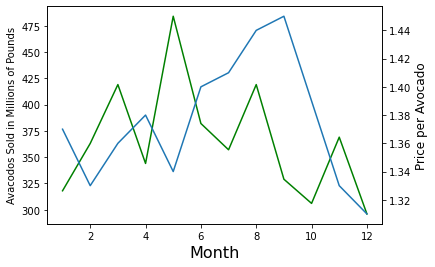

In [20]:
fig, ax = plt.subplots()
ax.plot(merge2015.index.values, merge2015["sum15"], color="green")
ax2=ax.twinx()
ax2.plot(merge2015.index.values, merge2015["mean15"])
ax.set_xlabel("Month", fontsize=16)
ax.set_ylabel("Avacodos Sold in Millions of Pounds")
ax2.set_ylabel("Price per Avocado", fontsize=12)
plt.show

In [21]:
#2016
avoc2016_df= avocado.loc[avocado.year == 2016]
monthavoc2016_df = (avoc2016_df.groupby("Month")["Millions"].agg(['sum']).round(decimals=0))
month_price_avg2016 = (avoc2016_df.groupby(["Month"])["AveragePrice"].agg(['mean']).round(decimals=2))
merge2016= pd.merge(month_price_avg2016, monthavoc2016_df, how="outer", on="Month")
merge2016= merge2016.rename(columns={"mean": "mean16", "sum": "sum16"})
merge2016.head(12)

,mean16,sum16
Month,,
1,1.24,475.0
2,1.24,429.0
3,1.22,391.0
4,1.21,402.0
5,1.20,561.0
6,1.28,410.0
7,1.40,467.0
8,1.41,371.0
9,1.43,362.0


<function matplotlib.pyplot.show(*args, **kw)>

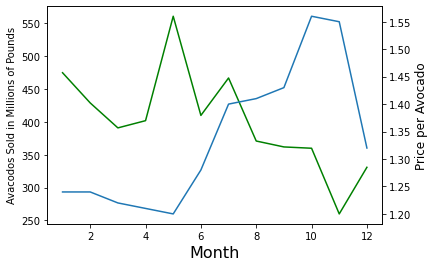

In [22]:
fig, ax = plt.subplots()
ax.plot(merge2016.index.values, merge2016["sum16"], color="green")
ax2=ax.twinx()
ax2.plot(merge2016.index.values, merge2016["mean16"])
ax.set_xlabel("Month", fontsize=16)
ax.set_ylabel("Avacodos Sold in Millions of Pounds")
ax2.set_ylabel("Price per Avocado", fontsize=12)
plt.show

In [23]:
#2017
avoc2017_df= avocado.loc[avocado.year == 2017]
monthavoc2017_df = (avoc2017_df.groupby("Month")["Millions"].agg(['sum']).round(decimals=0))
month_price_avg2017 = (avoc2017_df.groupby(["Month"])["AveragePrice"].agg(['mean']).round(decimals=2))
merge2017= pd.merge(month_price_avg2017, monthavoc2017_df, how="outer", on="Month")
merge2017= merge2017.rename(columns={"mean": "mean17", "sum": "sum17"})
merge2017.head(12)

,mean17,sum17
Month,,
1,1.28,533.0
2,1.21,472.0
3,1.40,359.0
4,1.50,490.0
5,1.53,426.0
6,1.55,410.0
7,1.56,475.0
8,1.70,338.0
9,1.84,285.0


<function matplotlib.pyplot.show(*args, **kw)>

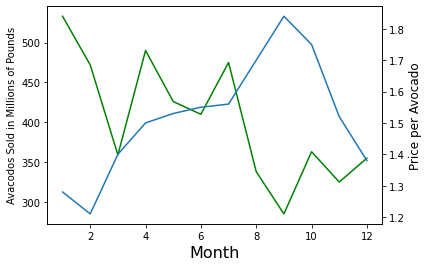

In [24]:
fig, ax = plt.subplots()
ax.plot(merge2017.index.values, merge2017["sum17"], color="green")
ax2=ax.twinx()
ax2.plot(merge2017.index.values, merge2017["mean17"])
ax.set_xlabel("Month", fontsize=16)
ax.set_ylabel("Avacodos Sold in Millions of Pounds")
ax2.set_ylabel("Price per Avocado", fontsize=12)
plt.show

In [25]:
#2018
avoc2018_df= avocado.loc[avocado.year == 2018]
monthavoc2018_df = (avoc2018_df.groupby("Month")["Millions"].agg(['sum']).round(decimals=0))
month_price_avg2018 = (avoc2018_df.groupby(["Month"])["AveragePrice"].agg(['mean']).round(decimals=2))
merge2018= pd.merge(month_price_avg2018, monthavoc2018_df, how="outer", on="Month")
merge2018= merge2018.rename(columns={"mean": "mean18", "sum": "sum18"})
merge2018.head(12)

,mean18,sum18
Month,,
1,1.37,534.0
2,1.32,498.0
3,1.34,455.0
4,1.32,602.0
5,1.28,552.0
6,1.31,494.0
7,1.34,599.0
8,1.42,433.0
9,1.48,501.0


<function matplotlib.pyplot.show(*args, **kw)>

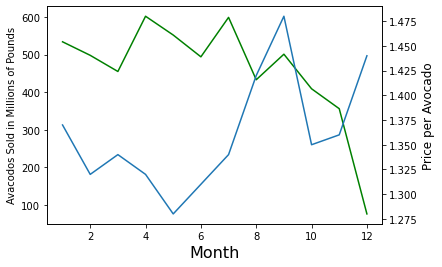

In [26]:
fig, ax = plt.subplots()
ax.plot(merge2018.index.values, merge2018["sum18"], color="green")
ax2=ax.twinx()
ax2.plot(merge2018.index.values, merge2018["mean18"])
ax.set_xlabel("Month", fontsize=16)
ax.set_ylabel("Avacodos Sold in Millions of Pounds")
ax2.set_ylabel("Price per Avocado", fontsize=12)
plt.show

In [27]:
#2019
avoc2019_df= avocado.loc[avocado.year == 2019]
monthavoc2019_df = (avoc2019_df.groupby("Month")["Millions"].agg(['sum']).round(decimals=0))
month_price_avg2019 = (avoc2019_df.groupby(["Month"])["AveragePrice"].agg(['mean']).round(decimals=2))
merge2019= pd.merge(month_price_avg2019, monthavoc2019_df, how="outer", on="Month")
merge2019= merge2019.rename(columns={"mean": "mean19", "sum": "sum19"})
merge2019.head(12)

,mean19,sum19
Month,,
1,1.27,503.0
2,1.19,534.0
3,1.22,634.0
4,1.42,465.0
5,1.53,467.0
6,1.52,553.0
7,1.73,390.0
8,1.61,411.0
9,1.46,534.0


<function matplotlib.pyplot.show(*args, **kw)>

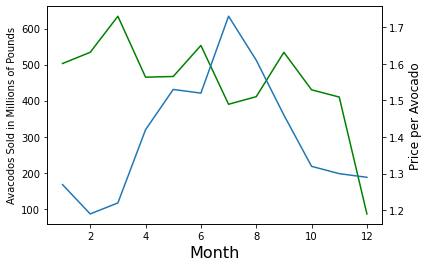

In [29]:
fig, ax = plt.subplots()
ax.plot(merge2019.index.values, merge2019["sum19"], color="green")
ax2=ax.twinx()
ax2.plot(merge2019.index.values, merge2019["mean19"])
ax.set_xlabel("Month", fontsize=16)
ax.set_ylabel("Avacodos Sold in Millions of Pounds")
ax2.set_ylabel("Price per Avocado", fontsize=12)
plt.show

In [66]:
mergeall= pd.merge(merge2015, merge2016, how="outer", on="Month")
mergeall= pd.merge(mergeall, merge2017, how="outer", on="Month")
mergeall= pd.merge(mergeall, merge2018, how="outer", on="Month")
mergeall= pd.merge(mergeall, merge2019, how="outer", on="Month")
mergeall

,mean15,sum15,mean16,sum16,mean17,sum17,mean18,sum18,mean19,sum19
Month,,,,,,,,,,
1,1.37,318.0,1.24,475.0,1.28,533.0,1.37,534.0,1.27,503.0
2,1.33,363.0,1.24,429.0,1.21,472.0,1.32,498.0,1.19,534.0
3,1.36,419.0,1.22,391.0,1.40,359.0,1.34,455.0,1.22,634.0
4,1.38,344.0,1.21,402.0,1.50,490.0,1.32,602.0,1.42,465.0
5,1.34,484.0,1.20,561.0,1.53,426.0,1.28,552.0,1.53,467.0
6,1.40,382.0,1.28,410.0,1.55,410.0,1.31,494.0,1.52,553.0
7,1.41,357.0,1.40,467.0,1.56,475.0,1.34,599.0,1.73,390.0
8,1.44,419.0,1.41,371.0,1.70,338.0,1.42,433.0,1.61,411.0
9,1.45,329.0,1.43,362.0,1.84,285.0,1.48,501.0,1.46,534.0


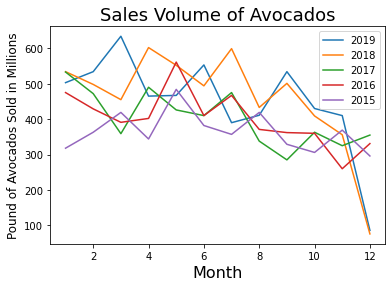

In [30]:
x19_ax=monthavoc2019_df.index.values
y19_ax=monthavoc2019_df["sum"]
x18_ax=monthavoc2018_df.index.values
y18_ax=monthavoc2018_df["sum"]
x17_ax=monthavoc2017_df.index.values
y17_ax=monthavoc2017_df["sum"]
x16_ax=monthavoc2016_df.index.values
y16_ax=monthavoc2016_df["sum"]
x15_ax=monthavoc2015_df.index.values
y15_ax=monthavoc2015_df["sum"]


plt.title("Sales Volume of Avocados", fontsize=18)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Pound of Avocados Sold in Millions", fontsize=12)
#plt.plot(x19_ax, y19_ax, x18_ax, y18_ax, x17_ax, y17_ax, x16_ax, y16_ax, x15_ax, y15_ax)
plt.plot(x19_ax, y19_ax, label="2019")
plt.plot(x18_ax, y18_ax, label="2018")
plt.plot(x17_ax, y17_ax, label="2017")
plt.plot(x16_ax, y16_ax, label="2016")
plt.plot(x15_ax, y15_ax, label="2015")
#fig.update_xaxes(nticks=12)
#plt.plot(figsize=(80,40))
plt.legend()
plt.show
plt.savefig('AvoSales.png')
#avocplot= monthavoc2019_df.plot(monthavoc2019_df['Month'], kind="line")
#avocplot

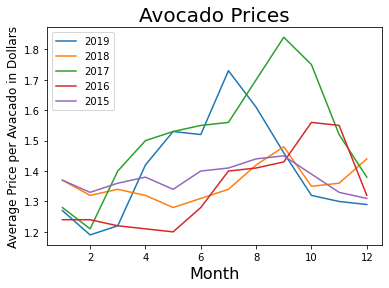

In [31]:
x19_ax=month_price_avg2019.index.values
y19_ax=month_price_avg2019["mean"]

x18_ax=month_price_avg2018.index.values
y18_ax=month_price_avg2018["mean"]

x17_ax=month_price_avg2017.index.values
y17_ax=month_price_avg2017["mean"]

x16_ax=month_price_avg2016.index.values
y16_ax=month_price_avg2016["mean"]

x15_ax=month_price_avg2015.index.values
y15_ax=month_price_avg2015["mean"]


plt.title("Avocado Prices", fontsize=20)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Average Price per Avacado in Dollars", fontsize= 12)
plt.plot(x19_ax, y19_ax, label="2019")
plt.plot(x18_ax, y18_ax, label="2018")
plt.plot(x17_ax, y17_ax, label="2017")
plt.plot(x16_ax, y16_ax, label="2016")
plt.plot(x15_ax, y15_ax, label="2015")
plt.legend()
plt.show
plt.savefig('Avocado Prices')